# Import relevant libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Import dataset and view

In [2]:
Real_data = pd.read_csv('C:/Users/personal/Documents/datasets/Real estate.csv', header=0)
Real_data.head(2)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2


In [3]:
Real_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


## Visualizing the clean data

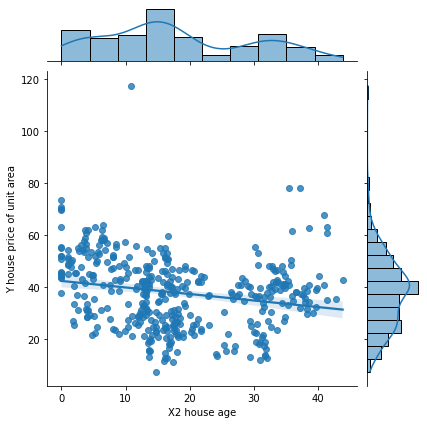

In [4]:
sns.jointplot(x = Real_data["X2 house age"],y = Real_data["Y house price of unit area"], data=Real_data, kind="reg")

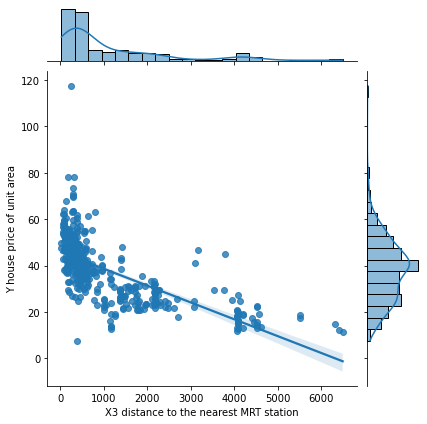

In [5]:
sns.jointplot(x = Real_data["X3 distance to the nearest MRT station"],y = Real_data["Y house price of unit area"], data=Real_data, kind="reg")

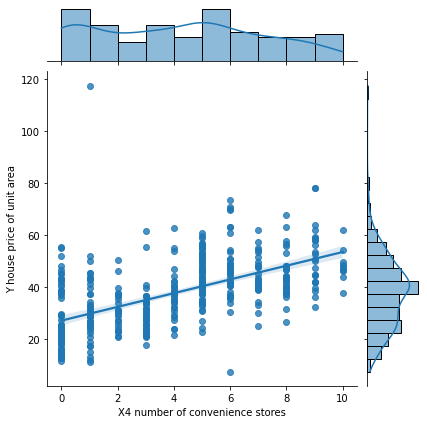

In [6]:
sns.jointplot(x = Real_data["X4 number of convenience stores"],y = Real_data["Y house price of unit area"], data=Real_data, kind="reg")

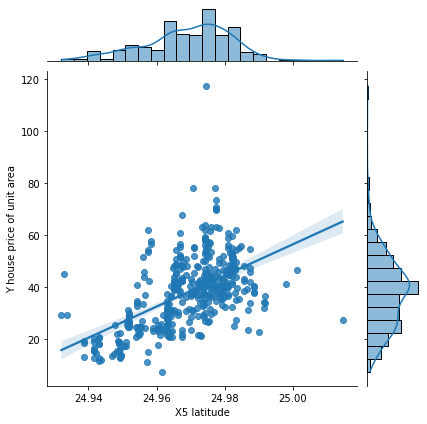

In [7]:
sns.jointplot(x = Real_data["X5 latitude"],y = Real_data["Y house price of unit area"], data=Real_data, kind="reg")

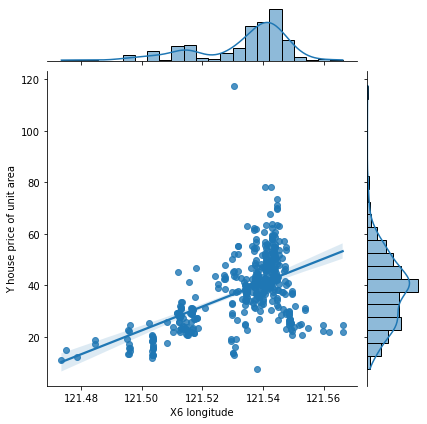

In [8]:
sns.jointplot(x = Real_data["X6 longitude"],y = Real_data["Y house price of unit area"], data=Real_data, kind="reg")

# Treating Outliers

###### Using Flooring and Capping, get the 99th percentile and the 1percentile of the datasets having outliers

In [9]:
upper_1 = np.percentile(Real_data["X2 house age"],[99])[0]
upper_1

41.248

In [10]:
Real_data[Real_data["X2 house age"] > upper_1]

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
128,129,2013.083,41.3,124.99120,6,24.96674,121.54039,60.7
173,174,2013.083,41.3,401.88070,4,24.98326,121.54460,35.1
192,193,2013.167,43.8,57.58945,7,24.96750,121.54069,42.7
361,362,2013.083,41.4,281.20500,8,24.97345,121.54093,63.3
392,393,2013.083,42.7,443.80200,6,24.97927,121.53874,35.3


In [11]:
Real_data["X2 house age"][Real_data["X2 house age"] > 3*upper_1] = 3*upper_1

C:\Users\personal\AppData\Local\Temp\ipykernel_12416\3914220759.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Real_data["X2 house age"][Real_data["X2 house age"] > 3*upper_1] = 3*upper_1


In [12]:
lower_1 = np.percentile(Real_data["X2 house age"],[1])[0]
lower_1

0.0

In [13]:
upper_2 = np.percentile(Real_data["X3 distance to the nearest MRT station"],[99])[0]
upper_2

5394.220430000004

In [14]:
Real_data[Real_data["X3 distance to the nearest MRT station"] > upper_2]

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
8,9,2013.500,31.7,5512.038,1,24.95095,121.48458,18.8
116,117,2013.000,30.9,6396.283,1,24.94375,121.47883,12.2
249,250,2012.833,18.0,6306.153,1,24.95743,121.47516,15.0
255,256,2013.417,31.5,5512.038,1,24.95095,121.48458,17.4
347,348,2013.583,17.4,6488.021,1,24.95719,121.47353,11.2


In [15]:
Real_data["X3 distance to the nearest MRT station"][Real_data["X3 distance to the nearest MRT station"] > 3*upper_2] = 3*upper_2

C:\Users\personal\AppData\Local\Temp\ipykernel_12416\3950960255.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Real_data["X3 distance to the nearest MRT station"][Real_data["X3 distance to the nearest MRT station"] > 3*upper_2] = 3*upper_2


In [16]:
lower_2 = np.percentile(Real_data["X3 distance to the nearest MRT station"],[1])[0]
lower_2

56.47425

In [17]:
Real_data[Real_data["X3 distance to the nearest MRT station"] < lower_2]

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
19,20,2012.667,1.5,23.38284,7,24.96772,121.54102,47.7
160,161,2012.917,3.5,49.66105,8,24.95836,121.53756,57.8
275,276,2012.667,1.5,23.38284,7,24.96772,121.54102,49.7
377,378,2013.333,3.9,49.66105,8,24.95836,121.53756,56.8


In [18]:
Real_data["X3 distance to the nearest MRT station"][Real_data["X3 distance to the nearest MRT station"] < 0.3*upper_2] = 0.3*upper_2

C:\Users\personal\AppData\Local\Temp\ipykernel_12416\557306977.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Real_data["X3 distance to the nearest MRT station"][Real_data["X3 distance to the nearest MRT station"] < 0.3*upper_2] = 0.3*upper_2


In [19]:
upper_3 = upper_1 = np.percentile(Real_data["Y house price of unit area"],[99])[0]
upper_3

70.88300000000001

In [20]:
Real_data[Real_data["Y house price of unit area"] > upper_3]

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
105,106,2012.833,0.0,1618.266129,6,24.97744,121.54458,71.0
166,167,2013.417,0.0,1618.266129,6,24.97744,121.54458,73.6
220,221,2013.333,37.2,1618.266129,9,24.97703,121.54265,78.3
270,271,2013.333,10.8,1618.266129,1,24.97460,121.53046,117.5
312,313,2013.583,35.4,1618.266129,9,24.97071,121.54069,78.0


In [21]:
Real_data["Y house price of unit area"][Real_data["Y house price of unit area"] > 3*upper_3] = 3*upper_3

C:\Users\personal\AppData\Local\Temp\ipykernel_12416\2311550299.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Real_data["Y house price of unit area"][Real_data["Y house price of unit area"] > 3*upper_3] = 3*upper_3


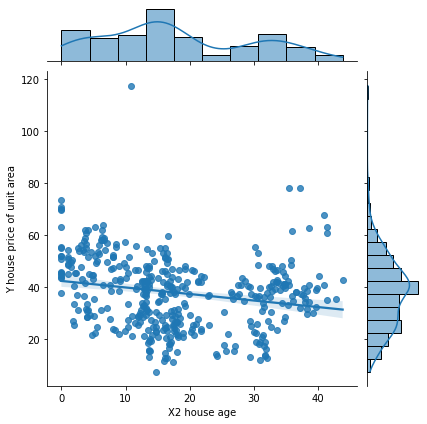

In [22]:
sns.jointplot(x = Real_data["X2 house age"],y = Real_data["Y house price of unit area"], data=Real_data, kind="reg")

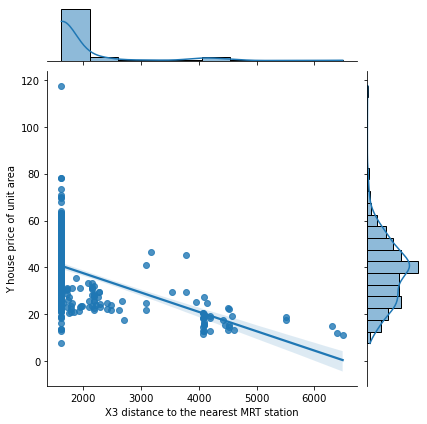

In [23]:
sns.jointplot(x = Real_data["X3 distance to the nearest MRT station"],y = Real_data["Y house price of unit area"], data=Real_data, kind="reg")

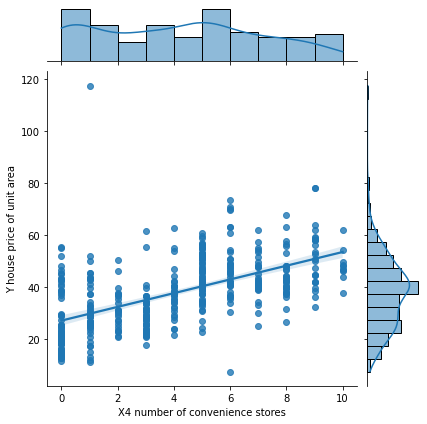

In [24]:
sns.jointplot(x = Real_data["X4 number of convenience stores"],y = Real_data["Y house price of unit area"], data=Real_data, kind="reg")

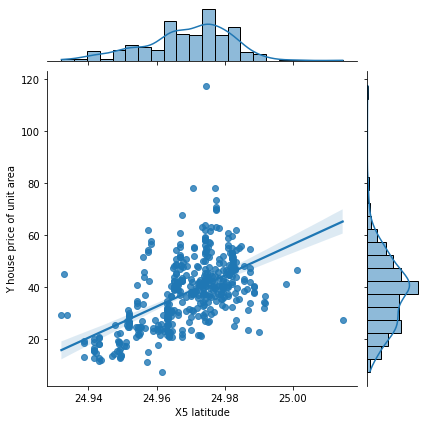

In [25]:
sns.jointplot(x = Real_data["X5 latitude"],y = Real_data["Y house price of unit area"], data=Real_data, kind="reg")

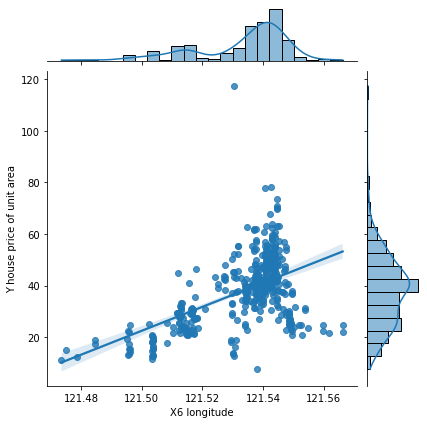

In [26]:
sns.jointplot(x = Real_data["X6 longitude"],y = Real_data["Y house price of unit area"], data=Real_data, kind="reg")

# Training 

#### Importing relevant libraries

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [28]:
# Divide the datasets into x and y
x = Real_data.drop("Y house price of unit area", axis=1)
y = Real_data["Y house price of unit area"]

In [29]:
# divide data into train and test
x_train,x_test,y_train,y_test = train_test_split(x, y,test_size=0.25,random_state=46)

In [30]:
x_train.shape, x_test.shape,y_train.shape,y_test.shape

((310, 7), (104, 7), (310,), (104,))

In [31]:
# Standardize data for uniformity
scaler = StandardScaler().fit(x_train)

In [32]:
x_train_s = scaler.transform(x_train)
x_test_s = scaler.transform(x_test)

### Create Regressor object

In [33]:
linear_ML = LinearRegression()

In [34]:
linear_ML.fit(x_train_s,y_train)

LinearRegression()

In [35]:
# creating predicted value for our y test set
y_test_pred = linear_ML.predict(x_test_s)

In [36]:
# predicting for our train...not necessary though
y_train_pred = linear_ML.predict(x_train_s)

In [37]:
# checking the r2_score
r2_score(y_test, y_test_pred)

0.5772077161245307

In [38]:
r2_score(y_train, y_train_pred)

0.5291252961141606